In [2]:
import numpy as np
import gc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib as mpl
#from sklearn.neighbors import KDTree
import threading
from numpy import linalg as LA
from sympy import Plane, Point3D
import pandas as pd
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import math
import copy
import sys
import os
from os.path import isfile, join
from scipy.spatial import cKDTree
from scipy.optimize import curve_fit
import scipy
from scipy import integrate
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import h5py

import yt

plt.rcParams['font.weight'] = 'normal'
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='stixgeneral'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.size'] = 20
plt.rc('figure', facecolor='w')

from yt.units import Mpc, km, s
from yt.utilities.physical_constants import mp, G, kb, c

# 2. a)

# Compared to the analytic solution, numerical results show small deviations.
# First, though it naturally happens in numerical simulations, the discontinuities in density, velocity, and energy plot can be seen.
# Second, there are wave-looking oscillating features before/after the discontinuities.

# 2. b)

In [15]:
df=pd.read_csv('shocktube_exact.txt',header=None,skiprows=10,sep='\s+')
df

,0,1,2,3,4
0,0.0121,0.5466,0.4293,1.0002,0.6731
1,0.0300,0.5466,0.4293,1.0002,0.6731
2,0.0479,0.5466,0.4293,1.0002,0.6731
3,0.0657,0.5466,0.4293,1.0002,0.6731
4,0.0836,0.5466,0.4293,1.0002,0.6731
...,...,...,...,...,...
5115,79.9228,0.5466,0.4293,1.0002,0.6731
5116,79.9407,0.5466,0.4293,1.0002,0.6731
5117,79.9585,0.5466,0.4293,1.0002,0.6731
5118,79.9764,0.5466,0.4293,1.0002,0.6731


In [17]:
gamma=1.4
x_exact=df[0]
rho_exact=df[1]
p_exact=df[2]
v_exact=df[4]
e_exact=p_exact/rho_exact/(gamma-1)

# MFM

In [19]:
unit_base = {
    "length": (1.0, "cm"),
    "velocity": (1.0, "cm/s"),
    "mass": (1.0, "g"),
}

ds=yt.load('MFM/output/snapshot_010.hdf5', unit_base=unit_base)
ad = ds.all_data()

gamma=1.4
x0=ad[('PartType0', 'particle_position_x')]
rho0=ad[('PartType0', 'density')]
v0=ad[('PartType0', 'particle_velocity_x')]
e0=ad[('PartType0', 'InternalEnergy')]
p0=e0*rho0*(gamma-1)

yt : [INFO     ] 2022-04-19 17:20:58,709 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-04-19 17:20:59,504 Parameters: current_time              = 5.0
yt : [INFO     ] 2022-04-19 17:20:59,514 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-19 17:20:59,523 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-19 17:20:59,532 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2022-04-19 17:20:59,536 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-19 17:20:59,799 Allocating for 3.200e+02 particles


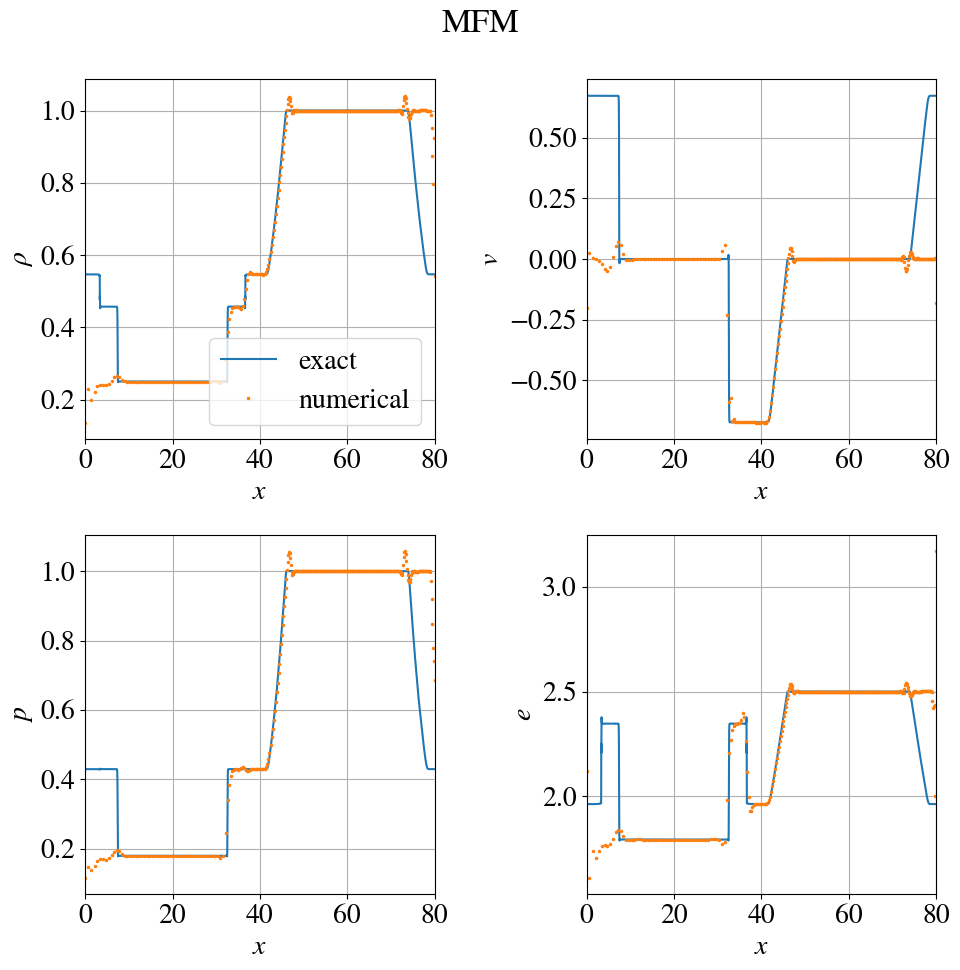

In [27]:
fig=plt.figure(figsize=(10,10),dpi=100)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.plot(x_exact,rho_exact,'-',markersize=1,label='exact')
ax1.plot(x0,rho0,'.',markersize=3,label='numerical')
ax2.plot(x_exact,v_exact,'-',markersize=1)
ax2.plot(x0,v0,'.',markersize=3)
ax3.plot(x_exact,p_exact,'-',markersize=1)
ax3.plot(x0,p0,'.',markersize=3)
ax4.plot(x_exact,e_exact,'-',markersize=1)
ax4.plot(x0,e0,'.',markersize=3)

ax1.set_xlim(0,80)
ax2.set_xlim(0,80)
ax3.set_xlim(0,80)
ax4.set_xlim(0,80)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$\rho$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$v$')
ax3.set_xlabel('$x$')
ax3.set_ylabel(r'$p$')
ax4.set_xlabel('$x$')
ax4.set_ylabel(r'$e$')

fig.suptitle('MFM')
plt.tight_layout()

# MFV

In [28]:
unit_base = {
    "length": (1.0, "cm"),
    "velocity": (1.0, "cm/s"),
    "mass": (1.0, "g"),
}

ds=yt.load('MFV/output/snapshot_010.hdf5', unit_base=unit_base)
ad = ds.all_data()

gamma=1.4
x0=ad[('PartType0', 'particle_position_x')]
rho0=ad[('PartType0', 'density')]
v0=ad[('PartType0', 'particle_velocity_x')]
e0=ad[('PartType0', 'InternalEnergy')]
p0=e0*rho0*(gamma-1)

yt : [INFO     ] 2022-04-19 17:28:47,608 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-04-19 17:28:48,054 Parameters: current_time              = 5.0
yt : [INFO     ] 2022-04-19 17:28:48,061 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-19 17:28:48,068 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-19 17:28:48,076 Parameters: domain_right_edge         = [80. 80. 80.]
yt : [INFO     ] 2022-04-19 17:28:48,080 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-19 17:28:48,147 Allocating for 5.120e+02 particles


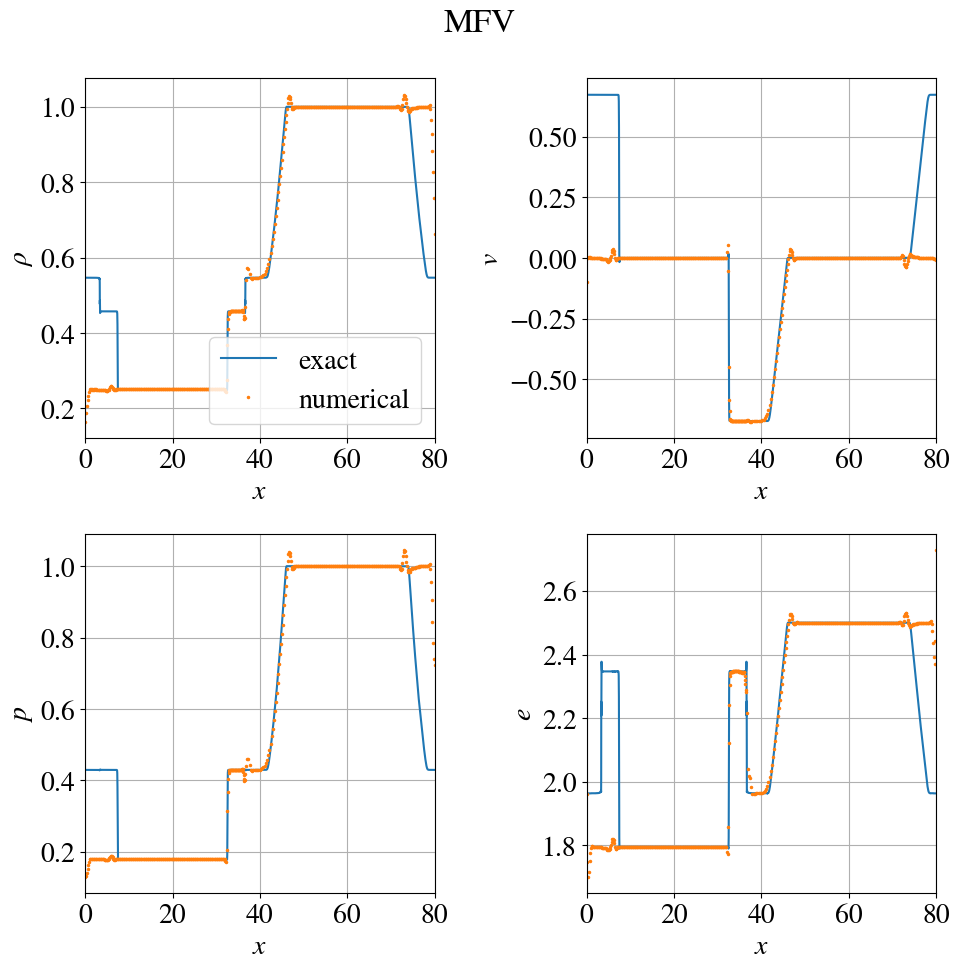

In [29]:
fig=plt.figure(figsize=(10,10),dpi=100)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.plot(x_exact,rho_exact,'-',markersize=1,label='exact')
ax1.plot(x0,rho0,'.',markersize=3,label='numerical')
ax2.plot(x_exact,v_exact,'-',markersize=1)
ax2.plot(x0,v0,'.',markersize=3)
ax3.plot(x_exact,p_exact,'-',markersize=1)
ax3.plot(x0,p0,'.',markersize=3)
ax4.plot(x_exact,e_exact,'-',markersize=1)
ax4.plot(x0,e0,'.',markersize=3)

ax1.set_xlim(0,80)
ax2.set_xlim(0,80)
ax3.set_xlim(0,80)
ax4.set_xlim(0,80)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.legend()

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$\rho$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$v$')
ax3.set_xlabel('$x$')
ax3.set_ylabel(r'$p$')
ax4.set_xlabel('$x$')
ax4.set_ylabel(r'$e$')

fig.suptitle('MFV')
plt.tight_layout()

# I don't know exactly what is happening to the analytic solution near the boundary but I suppose the difference is due to the boundary condition

# It is so interesting that MFM does better in density and pressure but MFV does better in velocity and energy.
# I can tell this by the size of oscillating features, especially near the discontinuities in solutions.

# 2. c)

In [40]:
ds=yt.load('MHD/output/snapshot_011.hdf5')
ad = ds.all_data()

yt : [INFO     ] 2022-04-16 00:39:24,131 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-04-16 00:39:24,135 Assuming length units are in kpc (physical)
yt : [INFO     ] 2022-04-16 00:39:24,532 Parameters: current_time              = 1.0
yt : [INFO     ] 2022-04-16 00:39:24,540 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-16 00:39:24,547 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-16 00:39:24,554 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2022-04-16 00:39:24,559 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-16 00:39:24,619 Allocating for 6.554e+04 particles


yt : [INFO     ] 2022-04-16 00:35:04,701 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 00:35:04,705 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 00:35:04,711 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 00:35:04,714 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 00:35:04,757 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



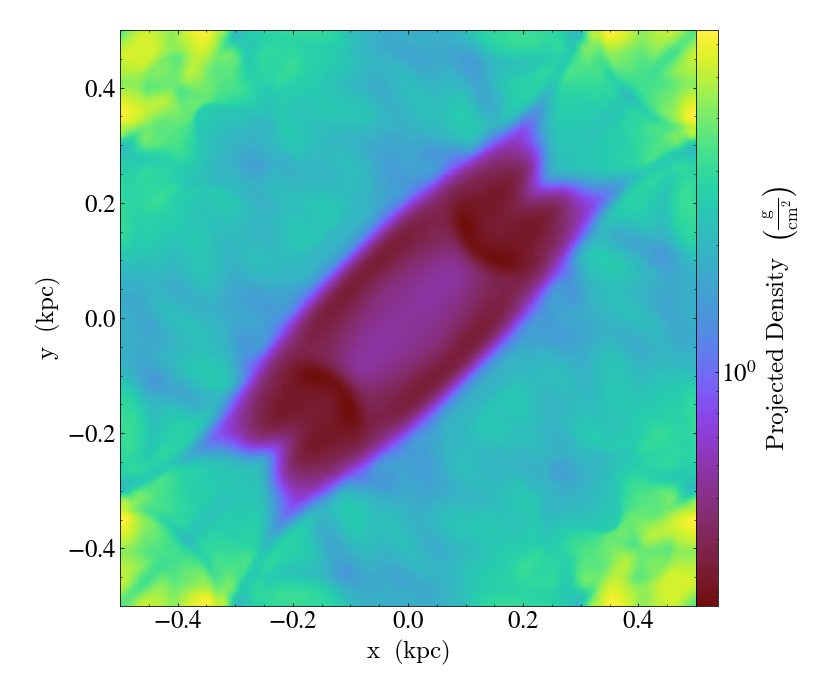

In [39]:
p = yt.ProjectionPlot(ds, 'z', ('gas','density'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','density'))
p.show()

In [ ]:
p = yt.ProjectionPlot(ds, 'z', ('gas','temperature'), data_source=ad, fontsize=25, buff_size=(800,800))

p.set_background_color(('gas','temperature'))
p.show()

In [90]:
def _MagneticFieldStrength(field, data):
    return (
        (ad[('all','MagneticField')][:,0]**2+ad[('all','MagneticField')][:,1]**2+ad[('all','MagneticField')][:,2]**2)**0.5
    )

ds.add_field(
    name=("all", "MagneticFieldStrength"),
    function=_MagneticFieldStrength,
    sampling_type="local",
)

yt : [WARNING  ] 2022-04-16 02:04:08,386 Field ('all', 'MagneticFieldStrength') already exists. To override use `force_override=True`.


ReferenceError: weakly-referenced object no longer exists

yt : [INFO     ] 2022-04-16 01:38:29,938 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,941 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,947 xlim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,950 ylim = 0.000000 1.000000
yt : [INFO     ] 2022-04-16 01:38:29,960 Splatting (('all', 'MagneticFieldStrength')) onto a 800 by 800 mesh using method 'ngp'



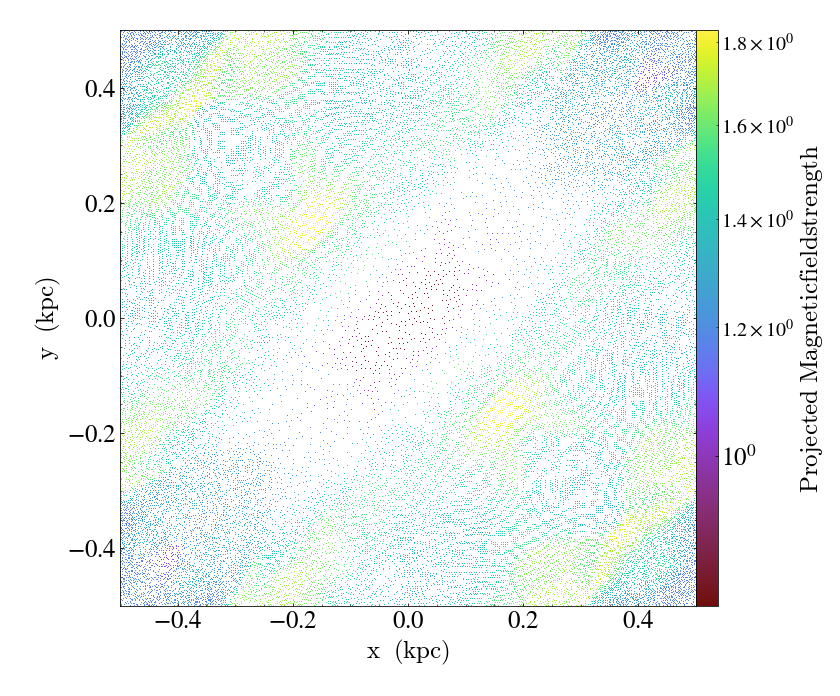

<Figure size 432x288 with 0 Axes>

In [68]:
kwargs={'markersize': 5}
p = yt.ParticlePlot(ds, ("all", "particle_position_x"), ("all", "particle_position_y"), ('all','MagneticFieldStrength'), fontsize=25)

p.show()
plt.tight_layout()

# The units are not in kpc, obviously.
# I don't know why there are no derived fields associated with magnetic field. 
# Perhaps it is because I am using YT4.0 not YT3.x.

In [38]:
ds.derived_field_list

[('PartType0', 'Coordinates'),
 ('PartType0', 'Density'),
 ('PartType0', 'InternalEnergy'),
 ('PartType0', 'MagneticField'),
 ('PartType0', 'Masses'),
 ('PartType0', 'ParticleChildIDsNumber'),
 ('PartType0', 'ParticleIDGenerationNumber'),
 ('PartType0', 'ParticleIDs'),
 ('PartType0', 'SmoothingLength'),
 ('PartType0', 'Temperature'),
 ('PartType0', 'Velocities'),
 ('PartType0', 'angular_momentum'),
 ('PartType0', 'angular_momentum_magnitude'),
 ('PartType0', 'angular_momentum_x'),
 ('PartType0', 'angular_momentum_y'),
 ('PartType0', 'angular_momentum_z'),
 ('PartType0', 'cylindrical_radius'),
 ('PartType0', 'cylindrical_theta'),
 ('PartType0', 'cylindrical_velocity_theta'),
 ('PartType0', 'cylindrical_velocity_z'),
 ('PartType0', 'cylindrical_z'),
 ('PartType0', 'density'),
 ('PartType0', 'index'),
 ('PartType0', 'mass'),
 ('PartType0', 'ones'),
 ('PartType0', 'particle_angular_momentum'),
 ('PartType0', 'particle_angular_momentum_magnitude'),
 ('PartType0', 'particle_angular_momentum_

# 2. e)

# Some of the test problem parameter files are outdated and I had to edit a little.
# But it was pretty simple because GIZMO gave me names missing parameters.
# Compared to other codes (e.g. Enzo and Ramses), this is a beginner-friendly feature.
# However in GIZMO, there are so many compile-time parameters (perhaps this is because GIZMO inherits the backbone of Gadget) which makes the user to compile the code over and over.
# A good thing is that GIZMO compiles a lot faster (< 1 min) than other codes (~ few mins for Enzo and Ramses).

# 3.

In [15]:
del ds
gc.collect()

77937

# MFM

In [16]:
unit_base = {
    "length": (1.0, "cm"),
    "velocity": (1.0, "cm/s"),
    "mass": (1.0, "g"),
}

ds=yt.load('HW2_IC_MFM/output/snapshot_001.hdf5', unit_base=unit_base)
ad = ds.all_data()

gamma=1.4
x0=ad[('PartType0', 'particle_position_x')]
rho0=ad[('PartType0', 'density')]
v0=ad[('PartType0', 'particle_velocity_x')]
e0=ad[('PartType0', 'InternalEnergy')]
p0=e0*rho0*(gamma-1)

yt : [INFO     ] 2022-04-16 16:28:00,354 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-04-16 16:28:00,734 Parameters: current_time              = 0.24499999999898137
yt : [INFO     ] 2022-04-16 16:28:00,741 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-16 16:28:00,749 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-16 16:28:00,756 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2022-04-16 16:28:00,760 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-16 16:28:00,820 Allocating for 2.000e+02 particles


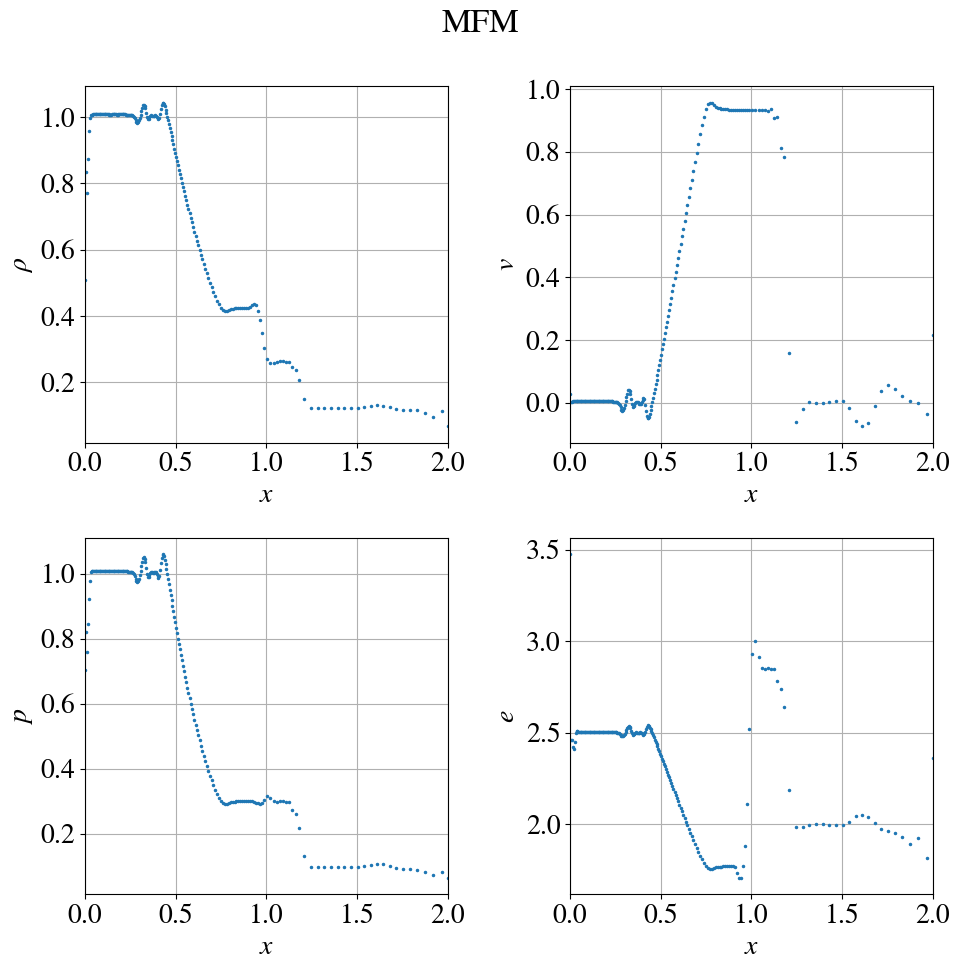

In [17]:
fig=plt.figure(figsize=(10,10),dpi=100)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.plot(x0,rho0,'.',markersize=3)
ax2.plot(x0,v0,'.',markersize=3)
ax3.plot(x0,p0,'.',markersize=3)
ax4.plot(x0,e0,'.',markersize=3)

ax1.set_xlim(0,2)
ax2.set_xlim(0,2)
ax3.set_xlim(0,2)
ax4.set_xlim(0,2)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$\rho$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$v$')
ax3.set_xlabel('$x$')
ax3.set_ylabel(r'$p$')
ax4.set_xlabel('$x$')
ax4.set_ylabel(r'$e$')

fig.suptitle('MFM')
plt.tight_layout()

# MFV

In [18]:
unit_base = {
    "length": (1.0, "cm"),
    "velocity": (1.0, "cm/s"),
    "mass": (1.0, "g"),
}

ds=yt.load('HW2_IC_MFV/output/snapshot_001.hdf5', unit_base=unit_base)
ad = ds.all_data()

gamma=1.4
x0=ad[('PartType0', 'particle_position_x')]
rho0=ad[('PartType0', 'density')]
v0=ad[('PartType0', 'particle_velocity_x')]
e0=ad[('PartType0', 'InternalEnergy')]
p0=e0*rho0*(gamma-1)

yt : [INFO     ] 2022-04-16 16:28:20,781 Omega Lambda is 0.0, so we are turning off Cosmology.
yt : [INFO     ] 2022-04-16 16:28:21,170 Parameters: current_time              = 0.24499999999898137
yt : [INFO     ] 2022-04-16 16:28:21,178 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2022-04-16 16:28:21,185 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-04-16 16:28:21,192 Parameters: domain_right_edge         = [2. 2. 2.]
yt : [INFO     ] 2022-04-16 16:28:21,197 Parameters: cosmological_simulation   = 0
yt : [INFO     ] 2022-04-16 16:28:21,262 Allocating for 2.000e+02 particles


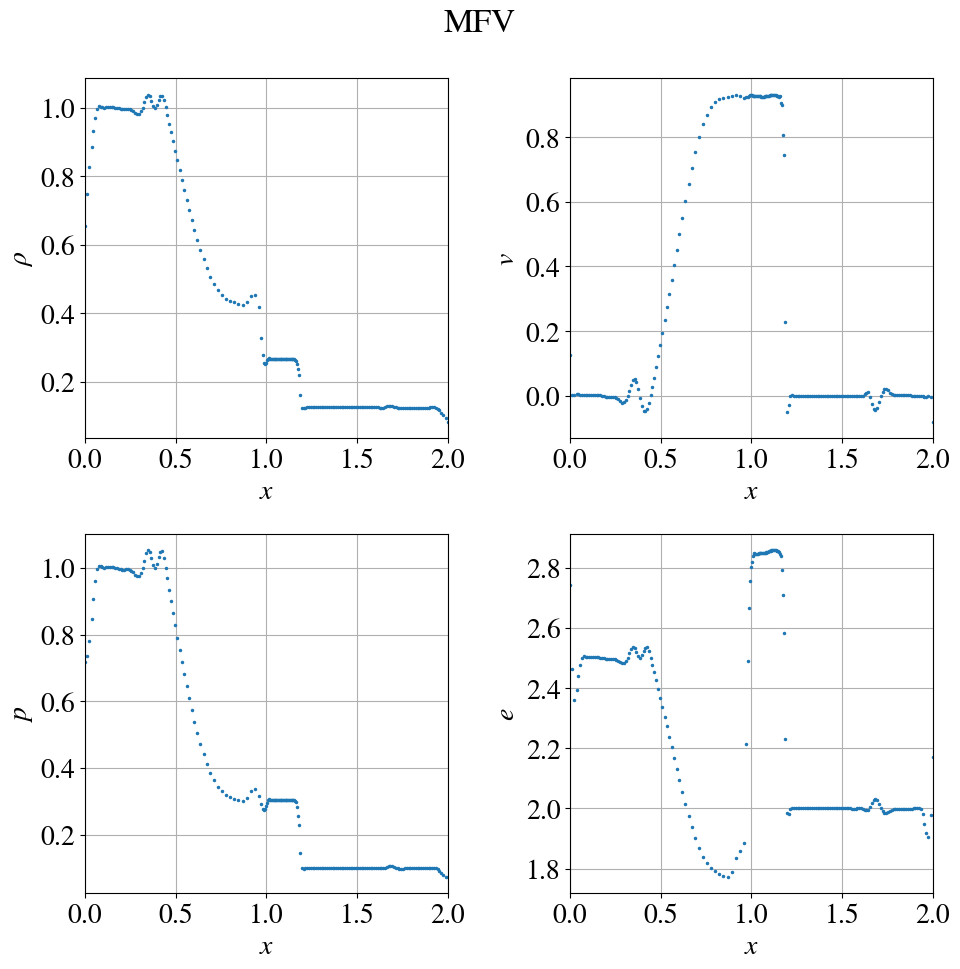

In [20]:
fig=plt.figure(figsize=(10,10),dpi=100)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.plot(x0,rho0,'.',markersize=3)
ax2.plot(x0,v0,'.',markersize=3)
ax3.plot(x0,p0,'.',markersize=3)
ax4.plot(x0,e0,'.',markersize=3)

ax1.set_xlim(0,2)
ax2.set_xlim(0,2)
ax3.set_xlim(0,2)
ax4.set_xlim(0,2)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

ax1.set_xlabel('$x$')
ax1.set_ylabel(r'$\rho$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$v$')
ax3.set_xlabel('$x$')
ax3.set_ylabel(r'$p$')
ax4.set_xlabel('$x$')
ax4.set_ylabel(r'$e$')

fig.suptitle('MFV')
plt.tight_layout()

# (I used your solution to HW2)
# Surprisingly, GIZMO didn't do better than our hand-written hydro solver.
# Again, there are some oscillating artifacts near the discontinuities.
# One good thing GIZMO does is that there is no chirping of energy and velocity.
# And MFM seems to do better that MFV in this problem.
# I didn't explore the effect of initial smoothing length which I set as ~ 2*(distance to neighboring particle).
# Maybe this can make a difference.